In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, decimate
from random import sample

In [4]:
def variance(data):
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance

In [5]:
def graph_data(time, current, peak = None):
    plt.plot(time, current)
    if peak is not None:
        plt.plot(time.iloc[peak], current.iloc[peak])
    plt.show()

In [6]:
def standardize_data_length(start_value, window_size = 15000):
    stand_start = start_value - window_size
    if stand_start < 0:
        stand_start = 0
    stand_end = stand_start + 2*window_size
    return([stand_start, stand_end])

In [7]:
def check_for_inrush(current, time, top_threshold_current = 20, bottom_threshold_current = 12, window = 15000):
    peaks, _ = find_peaks(current, prominence = current.max())
    #graph_data(time, current, peak = peaks)
    top_threshold_values = current[abs(current) > top_threshold_current].index.tolist()
    bottom_threshold_values = current[abs(current) > bottom_threshold_current].tolist()
    if len(bottom_threshold_values) == 0:
        return({'Error': "There is no in-rush event in the data"})
    if len(top_threshold_values) > 0:
        sample_start = min(top_threshold_values)
        sample_end = max(top_threshold_values)
    if 'sample_start' not in locals():
        if len(peaks) > 0:
            if variance(current.iloc[peaks]) < 1:
                return({'Error': "There is no in-rush event in the data"})
            else:
                border = standardize_data_length(peaks.min(), window_size = window)
                return({"Data": {'Time': time.iloc[border[0]:border[1]], 'Current': current.iloc[border[0]:border[1]]}})
        else:
            return({'Error': "There is no in-rush event in the data"})
    else:
        if len(peaks) > 0:
            if variance(current.iloc[peaks]) >= 1:
                if peaks.min() < sample_start:
                    sample_start = peaks.min()
                if peaks.max() > sample_end:
                    sample_end = peaks.max() 
        border = standardize_data_length(sample_start, window_size = window)
        return({"Data": {'Time': time.iloc[border[0]:border[1]], 'Current': current.iloc[border[0]:border[1]]}})  

In [8]:
def return_inrush(data_dict, error_factor = 0.5):
    if data_dict.get('Data', False) is not False:
        current = pd.Series(data_dict.get('Data')['Current'])
        time = pd.Series(data_dict.get('Data')['Time'])
        peaks, _ = find_peaks(current, prominence = current.max())
        if (len(current.iloc[peaks]) > 10) and (variance(list(current.iloc[peaks])[-10:]) < 1):
            # This means we have atleast some steady state in the data and seperation is necessary
            threshold_value = list(current.iloc[peaks])[-1]
            inrush_outline = []
            for outline_value in peaks:
                if current.iloc[outline_value] > (threshold_value + error_factor):
                    inrush_outline.append(outline_value)
            if len(inrush_outline) == 0:
                inrush_cutoff = -1
            else:
                inrush_cutoff = max(inrush_outline)
            #graph_data(time.iloc[:inrush_cutoff], current.iloc[:inrush_cutoff])
            return({"Data": {'Time': list(time.iloc[:inrush_cutoff]), 'Current': list(current.iloc[:inrush_cutoff])}})
        else:
            #graph_data(time, current)
            return({"Data": {'Time': list(time), 'Current': list(current)}})
    elif data_dict.get('Error', False) is not False:
        return(data_dict)

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Angle Grinder\OFF1.csv
{'Error': 'There is no in-rush event in the data'}


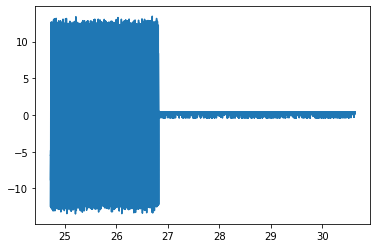

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Angle Grinder\OFF2.csv
{'Error': 'There is no in-rush event in the data'}


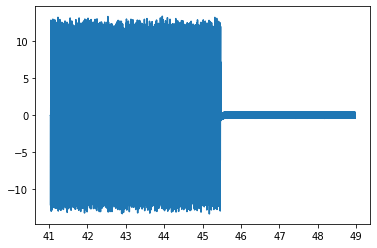

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Angle Grinder\ON1.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Angle Grinder\ON2.csv
Inrush!!


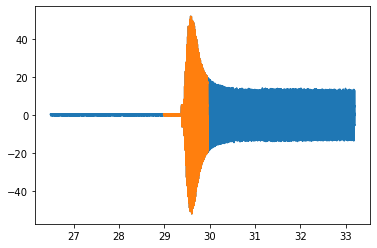

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_130748_analyzed.csv
{'Error': 'There is no in-rush event in the data'}


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_132150_analyzed.csv
{'Error': 'There is no in-rush event in the data'}


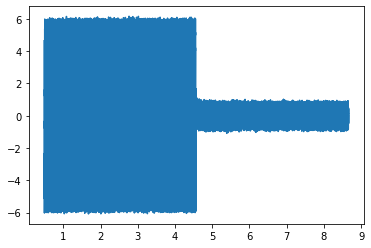

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_132552_analyzed.csv
Inrush!!


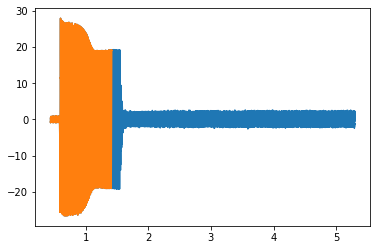

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_162534_analyzed.csv
Inrush!!


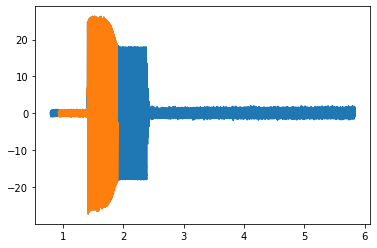

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_173929_analyzed.csv
Inrush!!


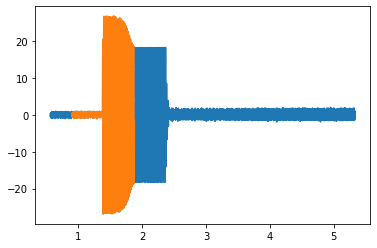

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_185723_analyzed.csv
Inrush!!


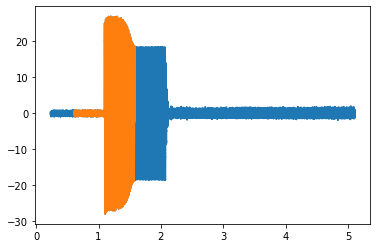

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_201618_analyzed.csv
Inrush!!


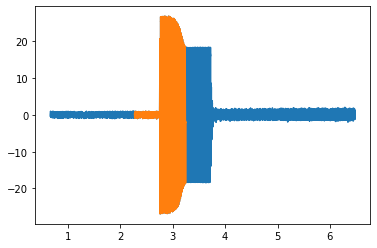

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021715_214212_analyzed.csv
Inrush!!


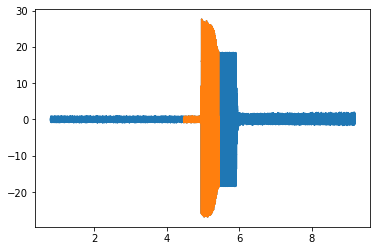

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_030551_analyzed.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_042746_analyzed.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_054940_analyzed.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_071334_analyzed.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_083228_analyzed.csv
Inrush!!


C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator\Real-Time-Data_2021716_095722_analyzed.csv
Inrush!!


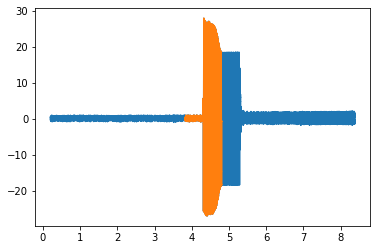

C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Shop Vac\ON_113838.csv
Inrush!!


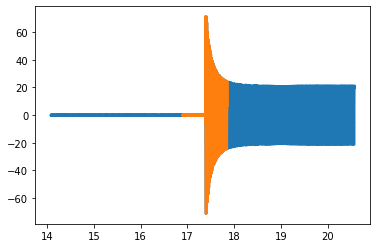

In [12]:
for root, dirs, files in os.walk(r"C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data"):
    for file in files:
        if file.split('.')[-1] !='json':
            print(os.path.join(root, file))
            raw_data = pd.read_csv(os.path.join(root, file))
            inrush_event_data = check_for_inrush(raw_data['Current'], raw_data['Time'], 25, 14, 30000)
            #inrush_event_data = return_inrush(inrush_dict)
            plt.plot(raw_data["Time"], raw_data["Current"])
            if inrush_event_data.get('Error', False) is not False:
                print(inrush_event_data)
            else:
                plt.plot(inrush_event_data["Data"]["Time"], inrush_event_data["Data"]["Current"])
                print('Inrush!!')
            plt.show()

In [1]:
def inrush_data_prep(data_path, output_file_path, top_threshold_current = 20, bottom_threshold_current = 12, window = 15000):
    # Read in the refined data, extract infush events, and write inrush data to new file 
    file_count = 0
    for (dirpath, dirnames, filenames) in os.walk(data_path):
        for filename in filenames:
            if filename.split('.')[-1] !='json':
                raw_data = pd.read_csv(os.path.join(dirpath, filename))
                inrush_event_data = check_for_inrush(raw_data['Current'], raw_data['Time'], top_threshold_current, bottom_threshold_current, window)
                #inrush_event_data = return_inrush(inrush_dict)
                if inrush_event_data.get('Error', False) is False:
                    data_df = pd.DataFrame(inrush_event_data['Data'])
                    data_df.to_csv(os.path.join(output_file_path, filename), index=False)
                    file_count = file_count + 1
                    if file_count % 20 == 0:
                        print("\t {} Files filtered.".format(file_count))
    print("Jobs Done!\n")

In [41]:
data_path = r"C:\Users\hcollins\Documents\Tac Power\PLAID Refined Data\Refined Submetered Data"
output_file_path = r"C:\Users\hcollins\Documents\Tac Power\Training Data\Refined Submetered Data"
inrush_data_prep(data_path, output_file_path, 25, 14)

	 20 Files filtered.
	 40 Files filtered.
	 60 Files filtered.
	 80 Files filtered.
	 100 Files filtered.
	 120 Files filtered.
	 140 Files filtered.
	 160 Files filtered.
	 180 Files filtered.
	 200 Files filtered.
	 220 Files filtered.
	 240 Files filtered.
	 260 Files filtered.
	 280 Files filtered.
	 300 Files filtered.
Jobs Done!



In [13]:
data_path = r"C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Angle Grinder"
output_file_path = r"C:\Users\hcollins\Documents\Tac Power\Training Data\Angle Grinder"
inrush_data_prep(data_path, output_file_path, 25, 14, 30000)

Jobs Done!



In [14]:
data_path = r"C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Refrigerator"
output_file_path = r"C:\Users\hcollins\Documents\Tac Power\Training Data\Refrigerator"
inrush_data_prep(data_path, output_file_path, 25, 14, 30000)

Jobs Done!



In [15]:
data_path = r"C:\Users\hcollins\Documents\Tac Power\Tac Power Refined Data\Shop Vac"
output_file_path = r"C:\Users\hcollins\Documents\Tac Power\Training Data\Shop Vac"
inrush_data_prep(data_path, output_file_path, 25, 14, 30000)

Jobs Done!

